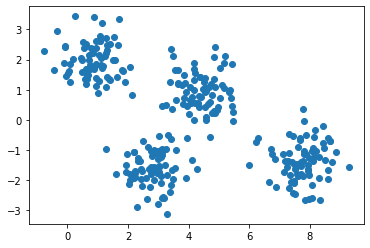

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# data file
file_to_load = "cdata.csv"

# Read file and store into pandas data frame
data = pd.read_csv(file_to_load)

#show data and plot x, y
plt.scatter(data['x'], data['y'])
#store x, y in data      
data = pd.DataFrame({'x': data['x'], 'y': data['y']})

## Problem 1 ##

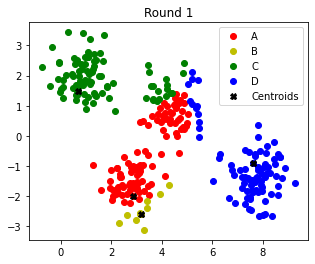

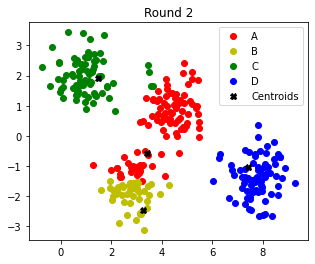

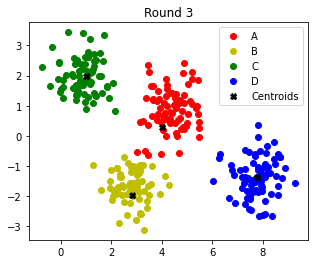

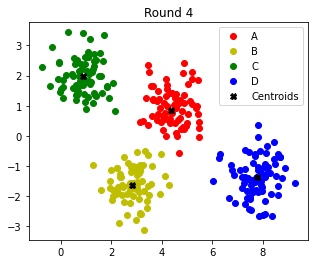

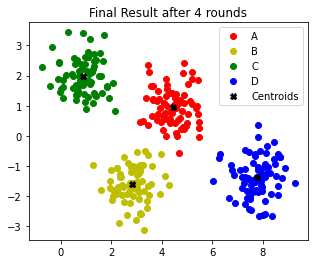

In [21]:
#initialization of values and dataframes needed
#k
#sample centroids
#dataframe for storing original kmeans for comparison
#a temporary dataframe to store cluster classification
k = 4
k_means = data.sample(k, replace = False)
k_means_cmp = pd.DataFrame()
distance = pd.DataFrame()
round_n = 0
while not k_means_cmp.equals(k_means):
    #using euclidean distance to find distance 
    n_clusters = 1
    for a, b in k_means.iterrows():
        distance[n_clusters] = (data[k_means.columns] - np.array(b)).pow(2).sum(1).pow(0.5)
        n_clusters += 1
    #add clusters to data through closest distance
    data['Clusters'] = distance.idxmin(axis = 1)
    #store kmeans into kmeans_cmp and adjust the kmeans
    k_means_cmp = k_means
    #adjust kmeans by aggregating mean from numpy
    k_means = data.groupby('Clusters').agg(np.mean)
    
    #Plot process until convergence
    #group data by clusters
    xy0 = data[data['Clusters'] == 1]
    xy1 = data[data['Clusters'] == 2]
    xy2 = data[data['Clusters'] == 3]
    xy3 = data[data['Clusters'] == 4]
    #show multiple graphs
    plt.subplots(1, 1, figsize=(5, 4))
    plt.plot(xy0['x'], xy0['y'], 'ro', label = 'A')
    plt.plot(xy1['x'], xy1['y'], 'yo', label = 'B')
    plt.plot(xy2['x'], xy2['y'], 'go', label = 'C')
    plt.plot(xy3['x'], xy3['y'], 'bo', label = 'D')
    plt.plot(k_means_cmp['x'], k_means_cmp['y'], 'kX', label = 'Centroids')
    plt.legend(loc = "upper right")
    #title
    if k_means_cmp.equals(k_means):
        plt.title('Final Result after ' + str(round_n) + ' rounds')
    else: 
        round_n += 1
        plt.title('Round '+str(round_n))
        
    


## Problem 2 ##

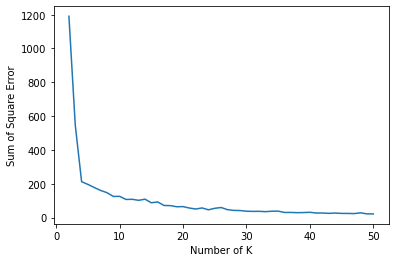

In [23]:
#initializing list to store sum of squared error
sse = []
for i in range(2, 51):
    #same algorithm for kmeans classification in problem 1
    k = i
    k_means = data.sample(k, replace = False)
    k_means_cmp = pd.DataFrame()
    distance = pd.DataFrame()
    while not k_means_cmp.equals(k_means):
        n_clusters = 1
        for a, b in k_means.iterrows():
            distance[n_clusters] = (data[k_means.columns] - np.array(b)).pow(2).sum(1).pow(0.5)
            n_clusters += 1
        data['Clusters'] = distance.idxmin(axis = 1)
        k_means_cmp = k_means
        k_means = data.groupby('Clusters').agg(np.mean)
        
    #SSE = sum of squared distance from centroids
    distance = sum(distance.min(axis = 1).pow(2))
    sse.append(distance)
sse_x = range(2, 51)
plt.ylabel("Sum of Square Error")
plt.xlabel("Number of K")
plt.plot(sse_x, sse)

## Problem 3 (with k fixed at 4) ##

Text(0.5, 1.0, 'Result of 10 times randomly pick the initial points')

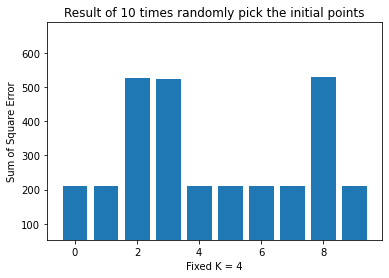

In [17]:
import math
#initializing list to store sum of squared error of random centroids
sse_rc = []
for i in range(0, 10):
    #same algorithm for kmeans classification in problem 1
    #set k = 4 (or 10)
    k = 4 #10
    #randomly sample 10 initial centroids
    k_means = data.sample(k, replace = False)
    k_means_cmp = pd.DataFrame()
    distance = pd.DataFrame()
    while not k_means_cmp.equals(k_means):
        n_clusters = 1
        for a, b in k_means.iterrows():
            distance[n_clusters] = (data[k_means.columns] - np.array(b)).pow(2).sum(1).pow(0.5)
            n_clusters += 1
        data['Clusters'] = distance.idxmin(axis = 1)
        k_means_cmp = k_means
        k_means = data.groupby('Clusters').agg(np.mean)
        
    #SSE = sum of squared distance from centroids
    distance = sum(distance.min(axis = 1).pow(2))
    sse_rc.append(distance)
x_rc = range(0, 10)
plt.ylabel("Sum of Square Error")
plt.xlabel("Fixed K = 4")
plt.bar(x_rc, sse_rc)
low = min(sse_rc)
high = max(sse_rc)
plt.ylim([math.ceil(low-0.5*(high-low)), math.ceil(high+0.5*(high-low))])
plt.title('Result of 10 times randomly pick the initial points')